 #  A Whale off the Port(folio)
 ---

Evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [ ]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

# Data Cleaning

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

In [ ]:
# Read-in whale returns

whale_path = Path('./Resources/whale_returns.csv')
whale_df = pd.read_csv(whale_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [ ]:
# Count nulls

whale_null_count = whale_df.isnull().sum()
whale_null_count

In [ ]:
# Drop nulls

whale_df = whale_df.dropna()
whale_nonull_count = whale_df.isnull().sum()
whale_nonull_count

## Algorithmic Daily Returns

Digest and read-ion daily returns, then clean data.

In [ ]:
# Read-in algorithmic returns

algo_path = Path('./Resources/algo_returns.csv')
algo_df = pd.read_csv(algo_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [ ]:
# Count nulls

algo_null_count = algo_df.isnull().sum()
algo_null_count

In [ ]:
# Drop nulls

algo_df = algo_df.dropna()
algo_nonull_count = algo_df.isnull().sum()
algo_nonull_count

## S&P 500 Returns
Bring in S&P 500 historic closing prices, to create a new daily returns DataFrame from the data. 

In [ ]:
# Reading S&P 500 Closing Prices

sp_path = Path('./Resources/sp500_history.csv')
sp_df = pd.read_csv(sp_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [ ]:
# Check Data Types

sp_type = sp_df.dtypes
algo_type = algo_df.dtypes
whale_type = whale_df.dtypes

# sp_type # will show 'object'
algo_type # will show 'float64'
#whale_type # will show 'float64'

# debugfunctions

In [ ]:
# Fix Data Types

sp_df['Close'] = sp_df['Close'].str.replace('$', '', regex=True).astype(float)
sp_df

In [21]:
# Calculate Daily Returns

sp_daily_rtn = sp_df.pct_change()
algo_daily_rtn = algo_df.pct_change()
whale_daily_rtn = whale_df.pct_change()

# sp_daily_rtn # will show 'S&P 500 Daily Returns'
# algo_daily_rtn # will show 'Alogrithm Daily Returns'
# whale_daily_rtn # will show 'Whale Daily Returns'

In [22]:
# Drop nulls
# daily_rtn.isna().sum()

sp_daily_rtn = sp_daily_rtn.dropna()
daily_null_chk = sp_daily_rtn.isnull().sum()
# daily_null_chk # will show 'Amount of Dulls from S&P No Nulls"

In [23]:
type(sp_daily_rtn)

pandas.core.frame.DataFrame

In [24]:
# Rename `Close` Column to be specific to this portfolio.

# sp_df = sp_df.rename(columns={'Close': 'SP'}, inplace=True)

sp_daily_rtn.rename(columns={'Close' : 'SP500'}, inplace=True)

In [25]:
sp_daily_rtn

,SP500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [26]:
sp_daily_rtn.columns

Index(['SP500'], dtype='object')

## Combine all uniquely distinguished portfolio returns: Whale, Algorithmic, and S&P 500 Returns

In [27]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.

combine = pd.concat([whale_df,algo_df,sp_daily_rtn], axis="columns", join="inner")
combine

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


---

# Quantitative Analysis

Visualized performance and risk metrics for the portfolios.

## Performance Anlysis

#### Plotting the daily returns.

<Axes: xlabel='Date'>

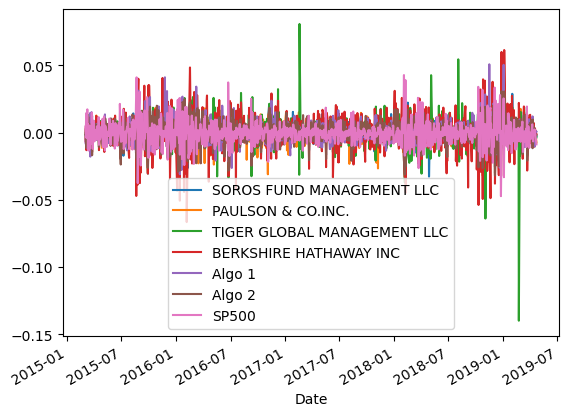

In [28]:
# Plot daily returns of all portfolios

daily_rtn_plot = combine.plot()
daily_rtn_plot

<Axes: xlabel='Date'>

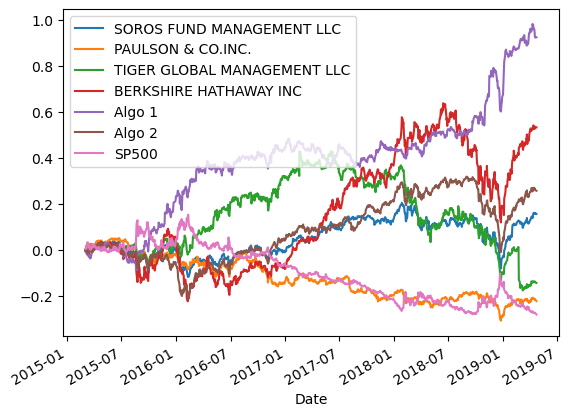

In [29]:
# Calculate cumulative returns of all portfolios

cumrtn = (1 + combine).cumprod() -1
cumrtn.head()

# # Plot cumulative return

cumul_plot = cumrtn.plot()
cumul_plot

---

# Risk Analysis

Visualized analytical indicators:

1. Box plot for each portfolio. 
2. Standard deviation for all portfolios
4. Which portfolios are riskier than the traditional S&P 500 benchmark?
5. Calculate the Annualized Standard Deviation for each portfolio

### Let's start visuals with a basic box plot for each portfolio


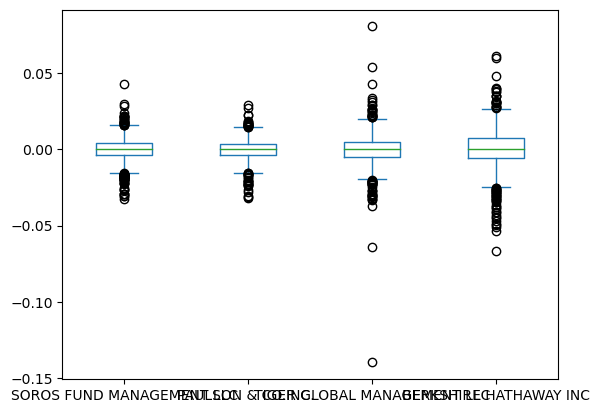

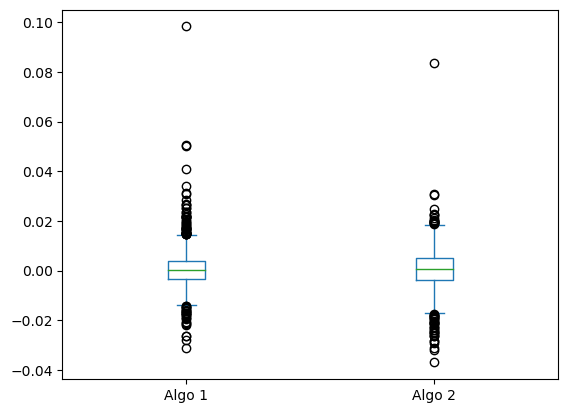

In [32]:
# Box plot to visually show risk

whale_bp = whale_df.plot.box()
algo_bp = algo_df.plot.box()

### Can't have Economics without your usual Standard Deviations

In [33]:
# Calculate the daily standard deviations of all portfolios

all_daily_std = combine.std()
all_daily_std

# combine.std() * np.sqrt(252)

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
SP500                          0.008587
dtype: float64

### Whose riskier than the overall market?

In [34]:
# Calculate  the daily standard deviation of S&P 500

sp_daily = sp_df.std()
sp_daily

# Determine which portfolios are riskier than the S&P 500

portfolios_only = pd.concat([whale_df,algo_df], axis="columns", join="inner")

daily_std = portfolios_only.std().sort_values(ascending=False)
daily_std

# variance = combine['Close'].var()
# variance

# covariance = combine['Close'].cov(combine['Algo'])
# covariance

# risky_ports = portsonly.std().sort_values(ascending=False)
# risky_ports

# test = sp_nonull.std()
# test.dtypes

# plot_corr = port_risk_corr.plot()
# plot_corr

# correlation = combine.corr(df_combined[1])
# correlation


BERKSHIRE HATHAWAY INC         0.012892
TIGER GLOBAL MANAGEMENT LLC    0.010876
Algo 2                         0.008327
SOROS FUND MANAGEMENT LLC      0.007879
Algo 1                         0.007601
PAULSON & CO.INC.              0.007010
dtype: float64

In [35]:
# Annualized Sharpe Ratios
sharpe_ratio = (daily_std.mean() * 252) / (daily_std * np.sqrt(252))
sharpe_ratio

BERKSHIRE HATHAWAY INC         11.202312
TIGER GLOBAL MANAGEMENT LLC    13.278777
Algo 2                         17.343431
SOROS FUND MANAGEMENT LLC      18.328773
Algo 1                         19.000182
PAULSON & CO.INC.              20.601469
dtype: float64

### Let's bring it all together and show it on an annual basis.

In [36]:
# Calculate the annualized standard deviation (252 trading days)

ann_std = daily_std * np.sqrt(252)
ann_std

BERKSHIRE HATHAWAY INC         0.204650
TIGER GLOBAL MANAGEMENT LLC    0.172648
Algo 2                         0.132186
SOROS FUND MANAGEMENT LLC      0.125080
Algo 1                         0.120660
PAULSON & CO.INC.              0.111281
dtype: float64

---

## Rolling Statistics

Risk changes over time. Leveraging rolling statistics for Risk and Beta. 

### Calculating and plot rolling using Standard Deviation fucntion `std` for all portfolios with 21-day window functionality implemented.

<Axes: xlabel='Date'>

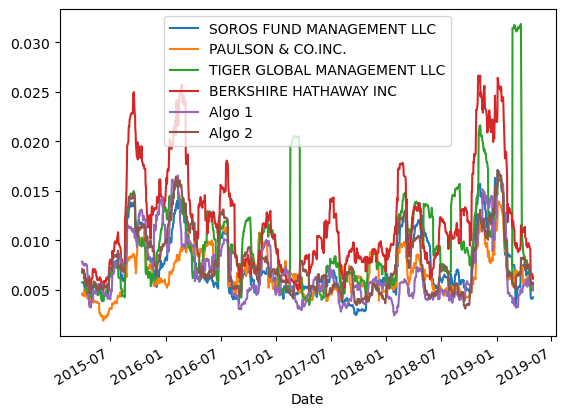

In [37]:
# Rolling standard deviation for all portfolios using a 21-day window calculator

all_port_roll_std = portfolios_only.rolling(window=21).std()

# Plotting the rolling standard deviation of all portfolios.

all_port_roll_std.plot()

### Using other great tools, libraries and enhanced functionality to plot the correlation.

In [38]:
import seaborn as sns

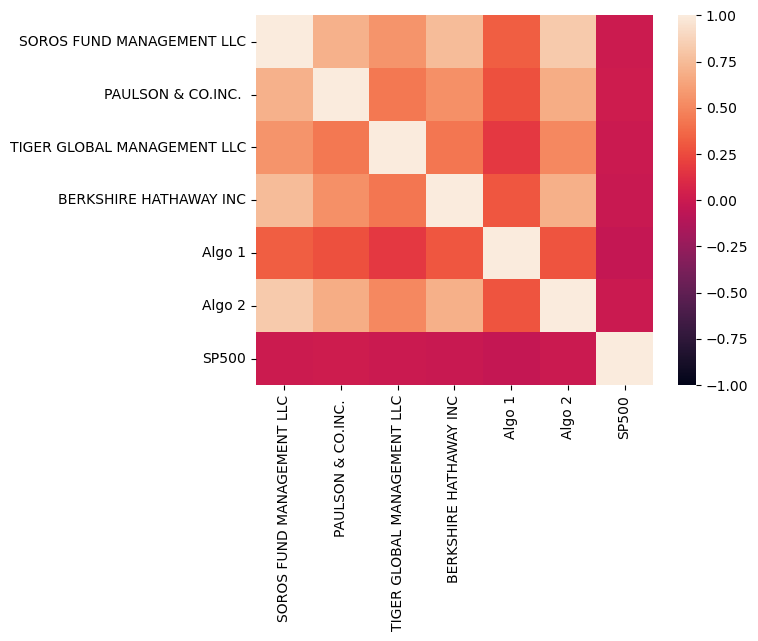

In [39]:
# Calculate correlation

correlation = combine.corr()

# Display correlation matrix

print(f'Several options to chose from, but you can unhash the option to see other features')

# correlation.heatmap()
sns.heatmap(correlation,vmin=-1,vmax=1)

plt.show();

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [41]:
# Show covariance of any single portfolio

covariance_algo_1 = combine['Algo 1'].cov(combine['SP500'])
covariance_algo_1

# Calculate variance of that portfolio with S&P 500 historic returns

variance_algo_1 = combine['SP500'].var()
variance_algo_1

# Compute beta

beta = covariance_algo_1 / variance_algo_1

# Plot beta trend

beta

-0.030149214542337564

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations.\

<Axes: xlabel='Date'>

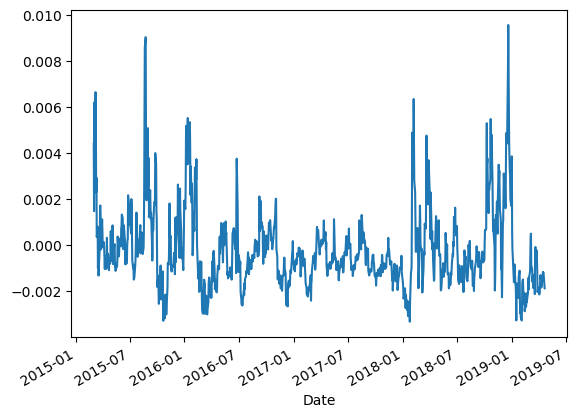

In [43]:
# Use `ewm` to calculate the rolling window

combine['SP500'].ewm(span=21).mean().plot()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, here is the Sharpe ratios visualized with a bar plot.

In [44]:
# Annualized Sharpe Ratios
sharpe_ratio = (daily_std.mean() * 252) / (daily_std * np.sqrt(252))
sharpe_ratio

BERKSHIRE HATHAWAY INC         11.202312
TIGER GLOBAL MANAGEMENT LLC    13.278777
Algo 2                         17.343431
SOROS FUND MANAGEMENT LLC      18.328773
Algo 1                         19.000182
PAULSON & CO.INC.              20.601469
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

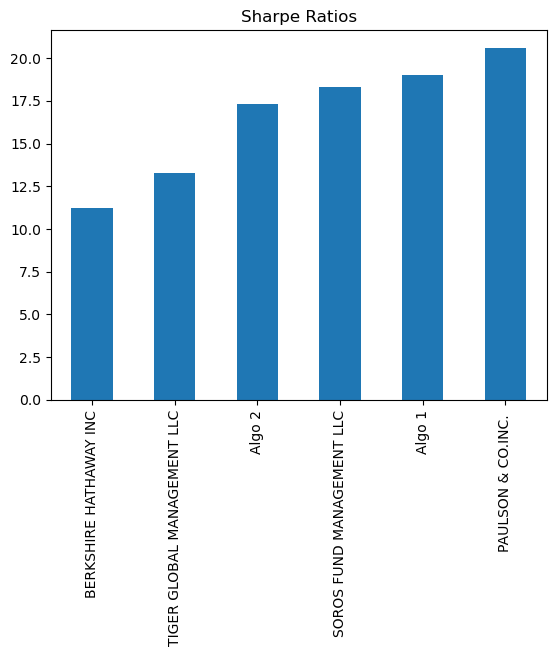

In [45]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot.bar(title='Sharpe Ratios')